# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [69]:
df_scaled = pd.read_csv('https://raw.githubusercontent.com/nfach98/LaptopClustering/refs/heads/main/laptop-clusters.csv')
df_scaled.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,Process (nm),Cores (Shaders),Base Clock (MHz),Memory Size (GB),Memory Type,Memory Bus Width (bits),TDP (W),Integrated GPU,Mobile GPU,Cluster
0,Apple,MacBook Pro,0.4,0.385542,0.096774,1.0,0.169576,0.194307,0.000000,0.482619,...,0.0,48 Execution Units,0.518583,0.00,No,0.00,0.032258,1,1,2
1,Apple,Macbook Air,0.4,0.385542,0.096774,1.0,0.162095,0.119693,0.000000,0.029911,...,0.0,48 Execution Units,0.475367,0.00,No,0.00,0.032258,1,1,2
2,HP,250 G6,0.2,0.662651,0.096774,0.0,0.291771,0.064854,0.333333,0.223929,...,0.0,24 Execution Units,0.518583,0.00,No,0.00,0.032258,1,1,2
3,Apple,MacBook Pro,0.4,0.638554,0.225806,1.0,0.284289,0.397073,0.000000,0.611964,...,0.0,768 Stream Processors,0.350043,0.25,2,0.25,0.093702,0,1,1
4,Apple,MacBook Pro,0.4,0.385542,0.096774,1.0,0.169576,0.272841,0.000000,0.482619,...,0.0,48 Execution Units,0.561798,0.00,No,0.00,0.072197,1,1,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [71]:
X = df_scaled.select_dtypes(include=['number']).drop(['Cluster'], axis=1).values
y = df_scaled['Cluster'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(866, 25), y_train=(866,)
Test set shape: X_test=(372, 25), y_test=(372,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [72]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [73]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3])
    tn, fp, fn, tp = np.array(cm.ravel()).reshape((4,4))
    return {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

In [74]:
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

df_scores = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_scores = pd.DataFrame(rows)
df_scores

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),0.997312,0.997328,0.997312,0.997308
1,Decision Tree (DT),1.000000,1.000000,1.000000,1.000000
2,Random Forest (RF),1.000000,1.000000,1.000000,1.000000
3,Support Vector Machine (SVM),1.000000,1.000000,1.000000,1.000000
4,Naive Bayes (NB),0.994624,0.994690,0.994624,0.994581


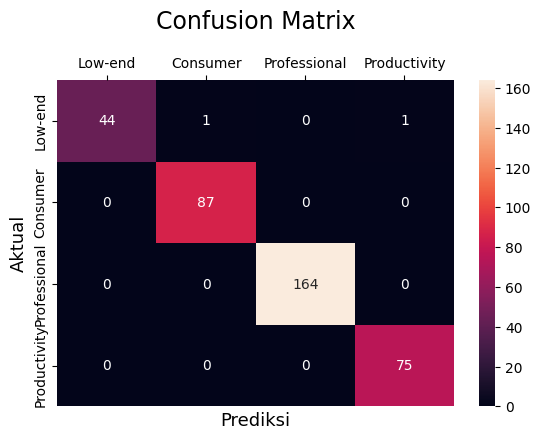

In [75]:
cm = results['Naive Bayes (NB)']['Confusion Matrix']
sns.heatmap(
    cm, 
    annot=True,
    fmt='g',
    xticklabels=['Low-end','Consumer', 'Professional', 'Productivity'],
    yticklabels=['Low-end','Consumer', 'Professional', 'Productivity']
)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.xlabel('Prediksi', fontsize=13)
plt.ylabel('Aktual', fontsize=13)

plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Dari 5 algoritma yang dicoba, semuanya ternyata mempunyai skor yang tinggi, bahkan 3 di antaranya memiliki akurasi 1.0 atau 100%. Sehingga jika berdasarkan skor maka algoritma terbaik adalah Desicion Tree, Random Forest, dan Support Vector Machine.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Dari beberapa algoritma yang dicoba, semuanya menghasilkan performa yang baik, bahkan beberapa di antaranya mendapat skor 1.0 dalam semua metrik. Sehingga tidak dilakukan lagi proses hyperparameter tuning. Hal ini mungkin disebabkan karena silhouette skor yang sudah tinggi ketika menghasilkan dataset pada tahap clustering sebelumnya, sehingga kecocokan model tinggi.

Walaupun terdapat algoritma yang menghasilkan akurasi hingga 1.0, tetapi dalam hal ini diputuskan untuk memilih algoritma Naive Bayes karena hasilnya lebih sesuai dengan hasil clustering di tahap sebelumnya, di mana ketika dibuat dalam plot ada sebagian kecil data yang termasuk dalam cluster lain yang lebih jauh dari cluster terdekatnya.

Namun akurasi tinggi hingga mendekati atau sama dengan 1.0 perlu diwaspadai karena bisa saja merupakan tanda overfitting terhadap data tes, sehingga diperlukan lebih banyak lagi baris dataset agar model yang dihasilkan lebih teruji.